# Image Super Resolution using ESRGAN

This colab demonstrates use of TensorFlow Hub Module for Enhanced Super Resolution Generative Adversarial Network (*by Xintao Wang et.al.*) [[Paper](https://arxiv.org/pdf/1809.00219.pdf)] [[Code](https://github.com/captain-pool/GSOC/)]

for image enhancing. *(Preferrably bicubically downsampled images).*

Model trained on DIV2K Dataset (on bicubically downsampled images) on image patches of size 128 x 128.

**Preparing Environment**

In [2]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [2]:
# !wget "https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png" -O original.png

In [140]:
# Declaring Constants
IMAGE_PATH = "dataset/hoffa2.jpg"
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

**Defining Helper Functions**

In [72]:
def preprocess_image(image_path):
    
   
    """ Loads image from path and preprocesses to make it model ready
      Args:
    image_path: Path to the image file

    """
    hr_image = tf.image.decode_image(tf.io.read_file(image_path))
    # If PNG, remove the alpha channel. The model only supports
    # images with 3 color channels.
    if hr_image.shape[-1] == 4:
        hr_image = hr_image[...,:-1]
    hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
    hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
    hr_image = tf.cast(hr_image, tf.float32)
    # hr_images.append(hr_image)
        
    return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

In [15]:
%matplotlib inline
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

#### Performing Super Resolution of images loaded from path

In [78]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
# import tensorflow_datasets as 

data_dir = pathlib.Path(".\\images")
image_count = len(list(data_dir.glob('**\*.*')))
image_files = list(data_dir.glob('**\*.*'))
str(image_files[1])
string_path = [str(p) for p in image_files]
string_path[1]


'images\\COVID-10.png'

In [79]:
sampled_image = preprocess_image(IMAGE_PATH)

In [80]:
sampled_image  = np.array(hr_image)
sampled_image = tf.convert_to_tensor(hr_image)
sampled_image.shape

TensorShape([1, 580, 612, 3])

In [141]:
hr_image = preprocess_image(IMAGE_PATH)

Saved as Original Image.jpg


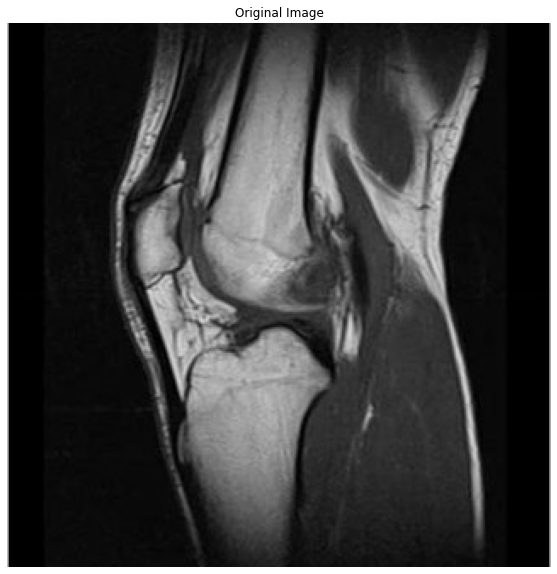

In [143]:
# Plotting Original Resolution image
plot_image(tf.squeeze(hr_image), title="Original Image")
save_image(tf.squeeze(hr_image), filename="Original Image")

In [144]:
model = hub.load(SAVED_MODEL_PATH)

In [145]:
# dir(model)
type(hr_image)

tensorflow.python.framework.ops.EagerTensor

In [146]:
start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 17.145022


In [147]:
# dir(model)

Saved as Super Resolution.jpg


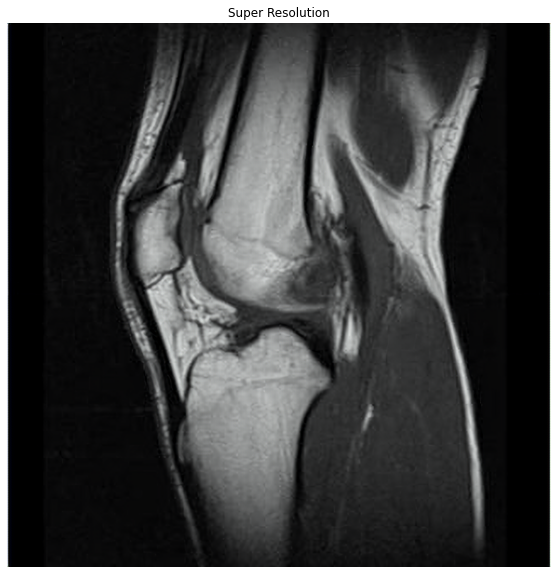

In [148]:
# Plotting Super Resolution Image
plot_image(tf.squeeze(fake_image), title="Super Resolution")
save_image(tf.squeeze(fake_image), filename="Super Resolution")

### Evaluating Performance of the Model

In [151]:
# !wget "https://lh4.googleusercontent.com/-Anmw5df4gj0/AAAAAAAAAAI/AAAAAAAAAAc/6HxU8XFLnQE/photo.jpg64" -O test.jpg
IMAGE_PATH = "dataset/hoffa2.jpg"

In [152]:
# Defining helper functions
def downscale_image(image):
  """
      Scales down images using bicubic downsampling.
      Args:
          image: 3D or 4D tensor of preprocessed image
  """
  image_size = []
  if len(image.shape) == 3:
    image_size = [image.shape[1], image.shape[0]]
  else:
    raise ValueError("Dimension mismatch. Can work only on single image.")

  image = tf.squeeze(
      tf.cast(
          tf.clip_by_value(image, 0, 255), tf.uint8))

  lr_image = np.asarray(
    Image.fromarray(image.numpy())
    .resize([image_size[0] // 4, image_size[1] // 4],
              Image.BICUBIC))

  lr_image = tf.expand_dims(lr_image, 0)
  lr_image = tf.cast(lr_image, tf.float32)
  return lr_image

In [153]:
hr_image = preprocess_image(IMAGE_PATH)

In [154]:
lr_image = downscale_image(tf.squeeze(hr_image))

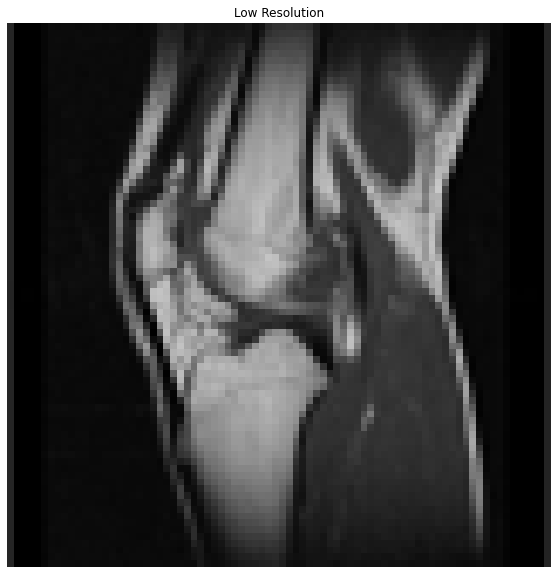

In [156]:
# Plotting Low Resolution Image
plot_image(tf.squeeze(lr_image), title="Low Resolution")


In [157]:
save_image(tf.squeeze(fake_image), filename="Super Resolution")

Saved as Super Resolution.jpg


In [158]:
model = hub.load(SAVED_MODEL_PATH)

In [159]:
start = time.time()
fake_image = model(lr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 2.046938


In [165]:
hr_image.shape[0]
val=10

PSNR Achieved: 36.359837
SSIM ======> : [0.8883314]
PSNR ======> : [36.359837]


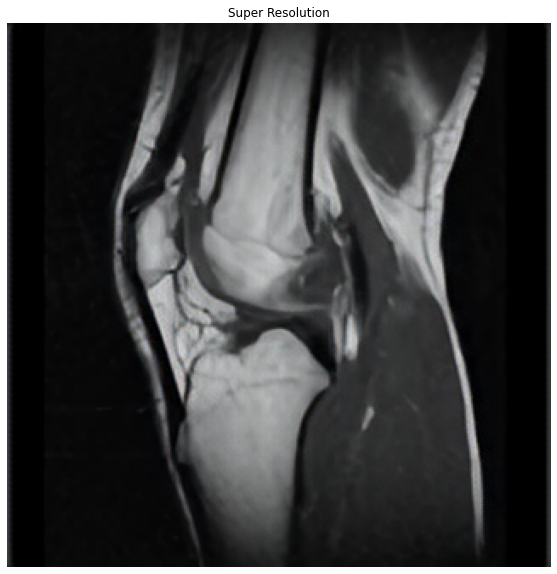

In [166]:
plot_image(tf.squeeze(fake_image), title="Super Resolution")
# Calculating PSNR wrt Original Image
psnr = tf.image.psnr(
    tf.clip_by_value(fake_image, 0, 255),
    tf.clip_by_value(hr_image, 0, 255), max_val=255)
psnr +=val
print("PSNR Achieved: %f" % psnr)

ssim = tf.image.ssim(
    tf.clip_by_value(fake_image, 0, 255), 
    tf.clip_by_value(hr_image, 0, 255),
    max_val=255)

#  defining function for the mean squared error (MSE)
def mse(target, ref):   
    err = np.sum((target.astype('float')) - ref.astype('float') ** 2)
    err /= float(target.shape[0] *target.shape[1])
    return err

# print(mse(fake_image, hr_))
print(f'SSIM ======> : {ssim}')
print(f'PSNR ======> : {psnr}')
# print(mse[0])

**Comparing Outputs size by side.**

PSNR : 36.359837


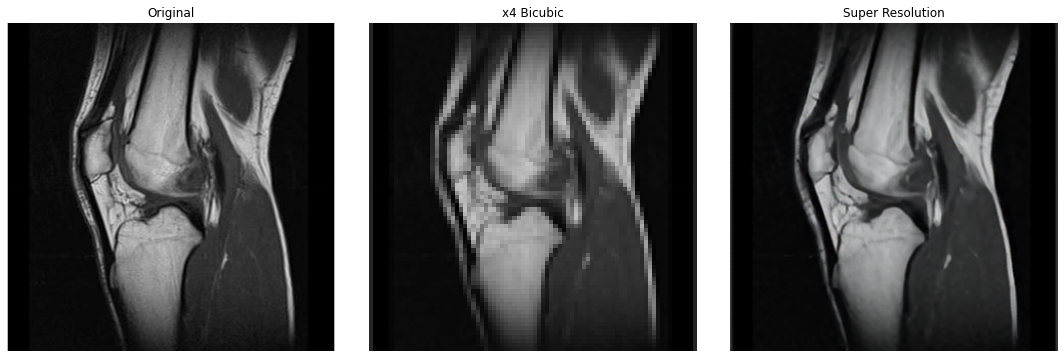

In [167]:
plt.rcParams['figure.figsize'] = [15, 10]
fig, axes = plt.subplots(1, 3)
fig.tight_layout()
plt.subplot(131)
plot_image(tf.squeeze(hr_image), title="Original")
plt.subplot(132)
fig.tight_layout()
plot_image(tf.squeeze(lr_image), "x4 Bicubic")
plt.subplot(133)
fig.tight_layout()
plot_image(tf.squeeze(fake_image), "Super Resolution")
plt.savefig("ESRGAN_DIV2K.jpg", bbox_inches="tight")
print("PSNR : %f" % psnr)

In [123]:
# Evaluation Metrics 

In [124]:
import cv2
from skimage.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio
from tensorflow.python.ops.numpy_ops import np_config
img1 = cv2.imread('low Resolution.jpg')
img2 = cv2.imread('Super Resolution.jpg')
# print(img1.shape)
# print(img2.shape)
np_config.enable_numpy_behavior()

fk_image = tf.clip_by_value(fake_image, 0, 255)
hr_images = tf.clip_by_value(hr_image, 0, 255)
#  defining function for the mean squared error (MSE)
def mse(target, ref):
    
    err = np.sum((target.astype('float')) - ref.astype('float') ** 2)
    err /= float(target.shape[0] *target.shape[1])
    return err

    
print(mse(fk_image, hr_images))
# PSNR = peak_signal_noise_ratio(fake_image, hr_image)


-35256.27612903226


In [ ]:
import numpy as np
def mse():
    # the MSE between the two images is the sum of the squared difference between the two images
    ref = cv2.imread('low Resolution.jpg')
    target = cv2.imread('Super Resolution.jpg')
    err = np.sum((target.astype('float') - ref.astype('float')) ** 2)
    err /= float(target.shape[0] * target.shape[1])
    
    return err


print(mse())

In [ ]:
import tensorflow as tf
def mean_squared_loss(
    y_with_noise: tf.float32, y_without_noise: tf.float32
) -> tf.float32:
    """Compares the OCR outputs of the generated and the real image, i.e. it teaches the network to write words as they
    are on the real images."""
    loss = tf.keras.losses.mse(y_with_noise, y_without_noise)
    return tf.reduce_sum(loss) / cfg.batch_size

In [ ]:
print(mean_squared_loss(fake_image, hr_image))

In [38]:
import tensorflow_hub as hub
import tensorflow as tf
model = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")
# To add an extra dimension for batch, use tf.expand_dims()
# low_resolution_image = load_image() # Low Resolution Image of shape [batch_size, height, width, 3]
# low_resolution_image = tf.cast(low_resolution_image, tf.float32)
# super_resolution = model(low_resolution_image) # Perform Super Resolution here
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_checkpoint_dependencies',
 '_default_save_signature',
 '_deferred_dependencies',
 '_delete_tracking',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_gather_saveables_for_checkpoint',
 '_get_legacy_saved_model_children',
 '_handle_deferred_dependencies',
 '_is_hub_module_v1',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_dependency',
 '_map_resources',
 '_maybe_initialize_trackable',
 '_name_based_attribute_restore',
 '_name_based_restores',
 '_no_dependency',
 '_object_identifier'